测试图片对比度和亮度变化

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def image_read(file):
    return cv2.imread(file)[:,:,::-1]

In [3]:
def adjust_gamma(file, gamma=None):
    if gamma==None:
        gamma =  np.random.uniform(0.5,2)
    invGamma = 1.0 / gamma
    img_org = image_read(file)
    
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    img_aft = cv2.LUT(img_org, table)
    return [img_org, img_aft]

In [4]:
def showimgs(imgs,origin_title,changed_title):
    plt.subplot(1,2,1)
    plt.imshow(imgs[0])
    plt.title(origin_title)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(imgs[1])
    plt.title(changed_title)
    plt.axis('off')
    plt.show()

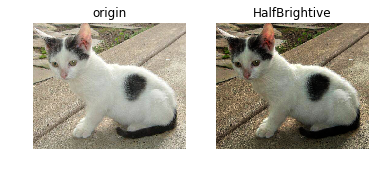

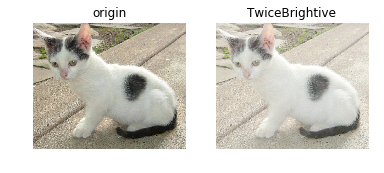

In [5]:
#测试亮度改变的效果
test_file = 'processed_train_data/cats/cat.3.jpg'
imgs = adjust_gamma(test_file,0.5)
showimgs(imgs,"origin","HalfBrightive")
imgs = adjust_gamma(test_file,2)
showimgs(imgs,"origin","TwiceBrightive")